*IMPORTING NECESSARY LIBRARIES*

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score,accuracy_score,roc_auc_score,roc_curve,f1_score,recall_score,confusion_matrix,auc
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

*LOAD DATASET*

In [23]:
X_train=np.load(r"C:/VS PROJECTS/GUVI FINAL PROJ/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz")['arr_0']
X_test=np.load(r"C:/VS PROJECTS/GUVI FINAL PROJ/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz")['arr_0']
y_train=np.load(r"C:/VS PROJECTS/GUVI FINAL PROJ/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz")['arr_0']
y_test=np.load(r"C:/VS PROJECTS/GUVI FINAL PROJ/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz")['arr_0']

#checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#converting 3D data into 2D
X_train_flat=X_train.reshape(X_train.shape[0],-1)
X_test_flat=X_test.reshape(X_test.shape[0],-1)

print(type(X_train_flat))
print(X_test_flat.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
(10000, 784)


*CONVERTING DATA FROM NUMPY ARRAY TO DATAFRAME*

In [24]:
X_train = pd.DataFrame(X_train_flat)
X_test = pd.DataFrame(X_test_flat)
y_train = pd.DataFrame(y_train,columns=['target'])
y_test = pd.DataFrame(y_test,columns=['target'])


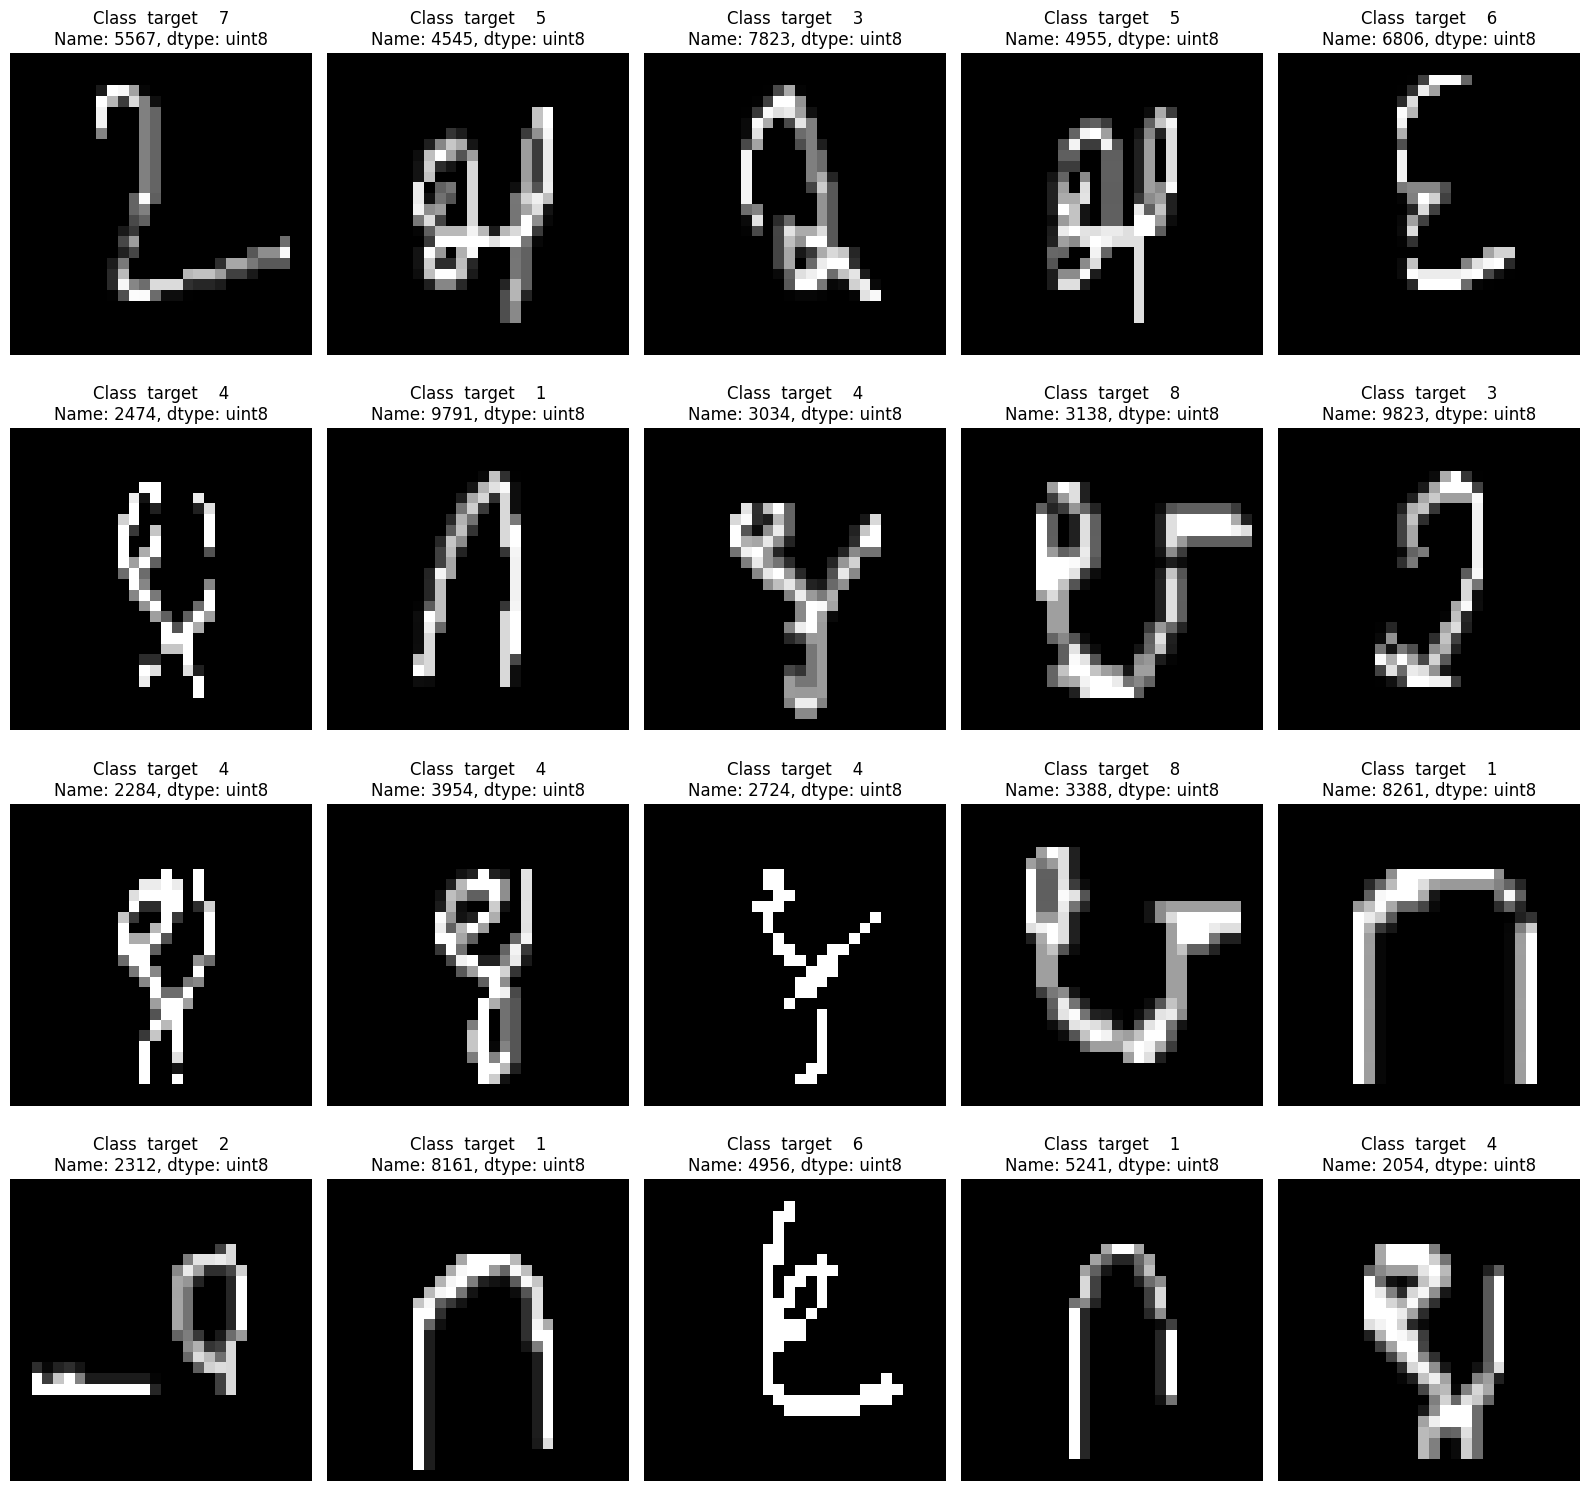

In [25]:
#Visual representation of classes with corresponding images
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,10000,20):
    plt.subplot(4,5,j)
    j=j+1
    plt.imshow(X_train.iloc[i, :].values.reshape(28, 28),cmap="gray") #Reshaping it into  28x28 image
    plt.axis("off")
    plt.title(f"Class  {y_train.iloc[i]}")
    plt.tight_layout()
plt.show()    

*LIST FOR VALUES TO PLOT THE GRAPH*    

In [26]:
# Accuracy Score List for Plotting the Graph
accuracy_list_dt=[]
accuracy_list_rf=[]
accuracy_list_nb=[]
accuracy_list_knn=[]
accuracy_list=[accuracy_list_dt,accuracy_list_rf,accuracy_list_nb,accuracy_list_knn]
                                  

# ROC_AUC_Score List for Plotting the Graph
roc_auc_dt=[]
roc_auc_rf=[]
roc_auc_nb=[]
roc_auc_knn=[]
roc_auc_list=[roc_auc_dt,roc_auc_rf,roc_auc_nb,roc_auc_knn]
def prediction_probability(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    return y_pred_prob

*Principle Component Analysis(PCA) for Dimensionality Reduction and Model Execution*

----------------------------------- COMPONENT SIZE 10 -----------------------------------------

----------DecisionTreeClassifier----------

DecisionTreeClassifier Accuracy: 0.8059
DecisionTreeClassifier Precision: 0.8056747606825219
DecisionTreeClassifier F1-score: 0.8047626700906736
DecisionTreeClassifier Recall: 0.8059
DecisionTreeClassifier ROC-AUC: 0.8921666666666667
DecisionTreeClassifier Confusion Matrix:
[[822  77  11  36   6   2   7   3  21  15]
 [ 31 921   3  10   7  10   2   2   7   7]
 [  7   1 935  10   9  22   6   5   2   3]
 [  9   5  21 763  42  44  26  66   7  17]
 [  5   1   4  59 768  68   7  22  22  44]
 [  4   9   9  40 126 705   7  25  30  45]
 [  2   8   8  66  14  19 768  72  10  33]
 [ 33  10   8  63  46   8 131 649  10  42]
 [ 21   6   5  10  19  13   3   5 893  25]
 [ 14  12   8   4  23   9  12  15  68 835]]


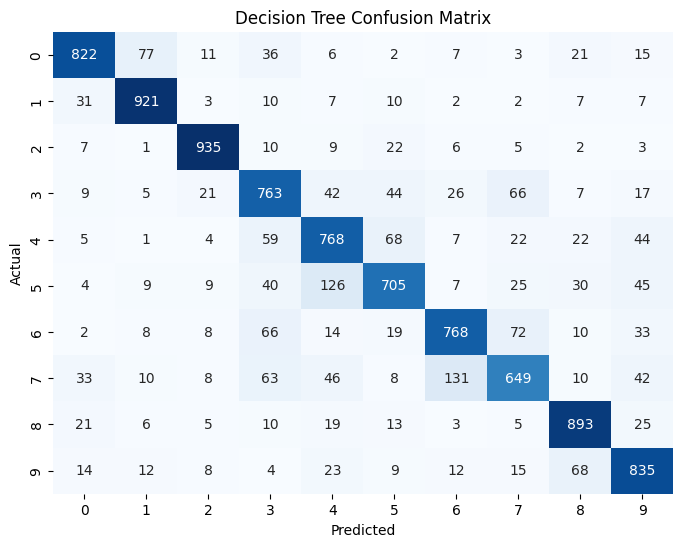

[[0.8059], [], [], []]
[[0.8922], [], [], []]

----------RandomForestClassifier----------

RandomForestClassifier Accuracy: 0.9249
RandomForestClassifier Precision: 0.9267796026252201
RandomForestClassifier F1-score: 0.9246551483774026
RandomForestClassifier Recall: 0.9248999999999998
RandomForestClassifier ROC-AUC: 0.9947650888888889
RandomForestClassifier Confusion Matrix:
[[877  93   1  12   4   0   2   1   8   2]
 [  9 970   0   9   6   1   0   0   3   2]
 [  5   0 980   3   2   8   1   0   1   0]
 [ 13   4   0 927   6  26   3  21   0   0]
 [  2   0   0  11 965  14   2   0   5   1]
 [  0   0   0  15 110 867   1   1   4   2]
 [  0   1   2  19  15  21 909   9   0  24]
 [ 15   3   0  26  27   5  68 833   4  19]
 [  8   2   0   0   2   9   0   0 977   2]
 [  2   1   0   0   3   0   8   3  39 944]]


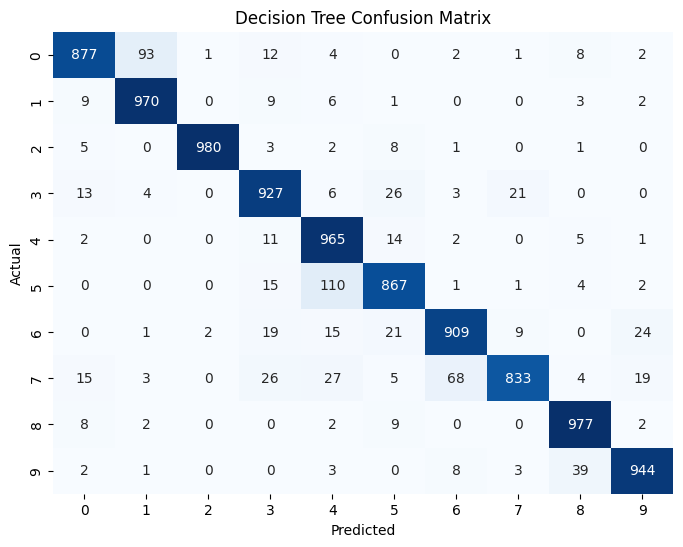

[[0.8059], [0.9249], [], []]
[[0.8922], [0.9948], [], []]

----------GaussianNB----------

GaussianNB Accuracy: 0.6258
GaussianNB Precision: 0.7454234197966514
GaussianNB F1-score: 0.6248144529573579
GaussianNB Recall: 0.6257999999999999
GaussianNB ROC-AUC: 0.9109404222222223
GaussianNB Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


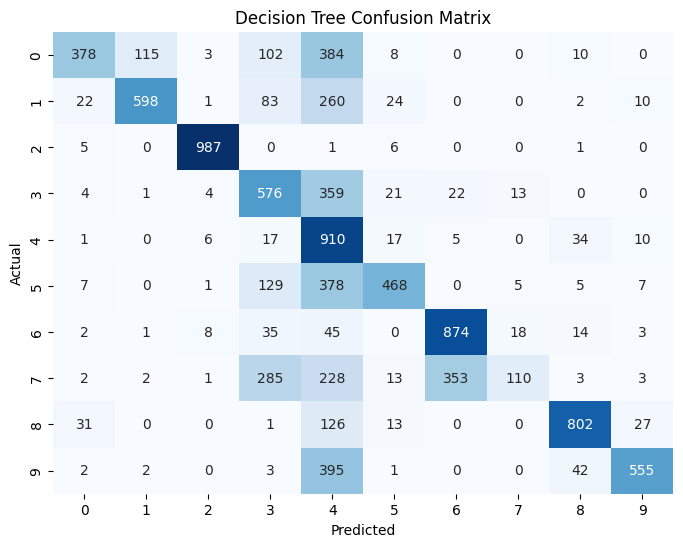

[[0.8059], [0.9249], [0.6258], []]
[[0.8922], [0.9948], [0.9109], []]


  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ROHITH VIGNESH\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



----------KNeighborsClassifier----------

KNeighborsClassifier Accuracy: 0.9166
KNeighborsClassifier Precision: 0.921741887468991
KNeighborsClassifier F1-score: 0.9163591670502814
KNeighborsClassifier Recall: 0.9166000000000001
KNeighborsClassifier ROC-AUC: 0.9855020388888889
KNeighborsClassifier Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


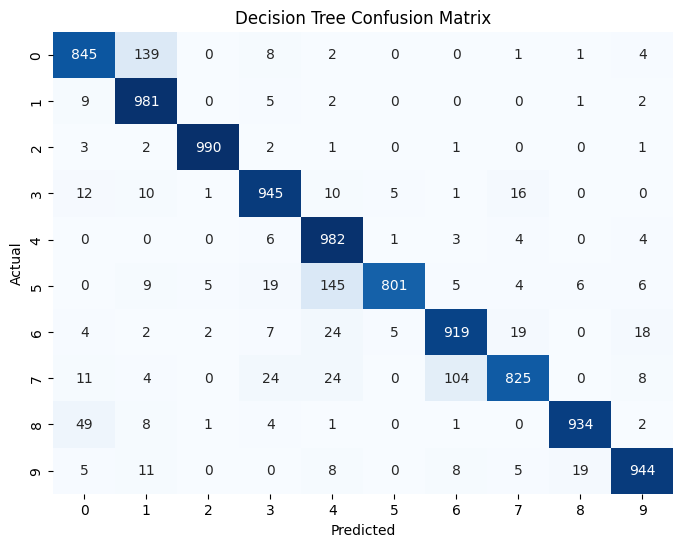

[[0.8059], [0.9249], [0.6258], [0.9166]]
[[0.8922], [0.9948], [0.9109], [0.9855]]
----------------------------------- COMPONENT SIZE 15 -----------------------------------------

----------DecisionTreeClassifier----------

DecisionTreeClassifier Accuracy: 0.8073
DecisionTreeClassifier Precision: 0.8068732874354477
DecisionTreeClassifier F1-score: 0.8063762901462198
DecisionTreeClassifier Recall: 0.8072999999999999
DecisionTreeClassifier ROC-AUC: 0.8929444444444444
DecisionTreeClassifier Confusion Matrix:
[[823  79   5  30   5   4   6  11  21  16]
 [ 42 908   3  10   8  10   5   0   5   9]
 [  7   3 936   9   5  25   3   5   2   5]
 [ 14   2  11 768  44  53  24  69   3  12]
 [  4   2   4  60 759  77   7  26  21  40]
 [  5  12   9  44 110 708  14  23  28  47]
 [  3   8   8  54  23  22 765  71   7  39]
 [ 34   7   7  53  39  11 125 667   7  50]
 [ 20   8   6  14  15   7   1   4 901  24]
 [ 15  14   1   4  23  10  11  13  71 838]]


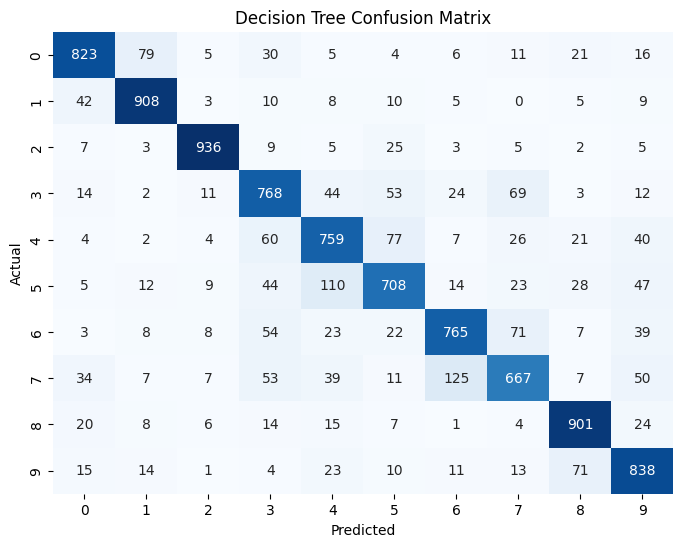

[[0.8059, 0.8073], [0.9249], [0.6258], [0.9166]]
[[0.8922, 0.8929], [0.9948], [0.9109], [0.9855]]

----------RandomForestClassifier----------

RandomForestClassifier Accuracy: 0.9246
RandomForestClassifier Precision: 0.9268440711092728
RandomForestClassifier F1-score: 0.9244069698073492
RandomForestClassifier Recall: 0.9245999999999999
RandomForestClassifier ROC-AUC: 0.9947571833333333
RandomForestClassifier Confusion Matrix:
[[881  94   1  12   3   0   2   0   5   2]
 [  9 969   0   8   5   2   0   0   4   3]
 [  3   1 984   2   2   6   1   0   1   0]
 [ 10   3   1 934  10  20   1  21   0   0]
 [  1   0   0  11 962  17   0   1   6   2]
 [  1   0   1  11 124 856   2   3   1   1]
 [  0   1   2  25  16  20 908   7   0  21]
 [ 21   2   1  25  28   4  66 836   3  14]
 [  5   3   0   1   1   8   0   0 979   3]
 [  3   1   0   0   3   0   7   1  48 937]]


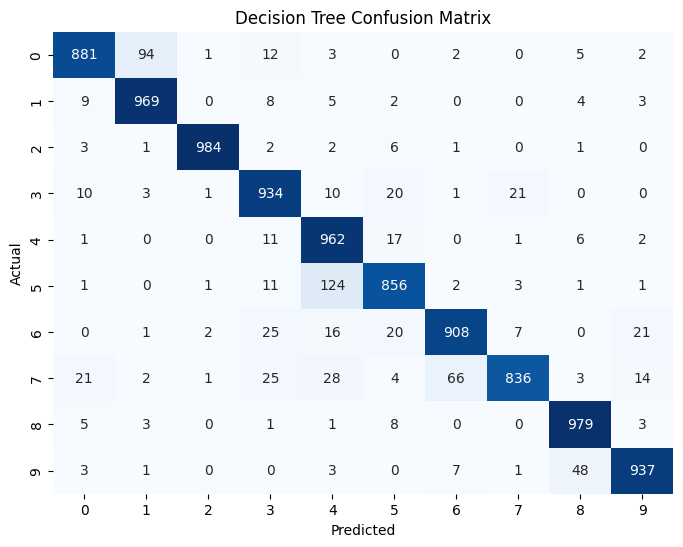

[[0.8059, 0.8073], [0.9249, 0.9246], [0.6258], [0.9166]]
[[0.8922, 0.8929], [0.9948, 0.9948], [0.9109], [0.9855]]

----------GaussianNB----------

GaussianNB Accuracy: 0.6258
GaussianNB Precision: 0.7454234197966514
GaussianNB F1-score: 0.6248144529573579
GaussianNB Recall: 0.6257999999999999
GaussianNB ROC-AUC: 0.9109404222222223
GaussianNB Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


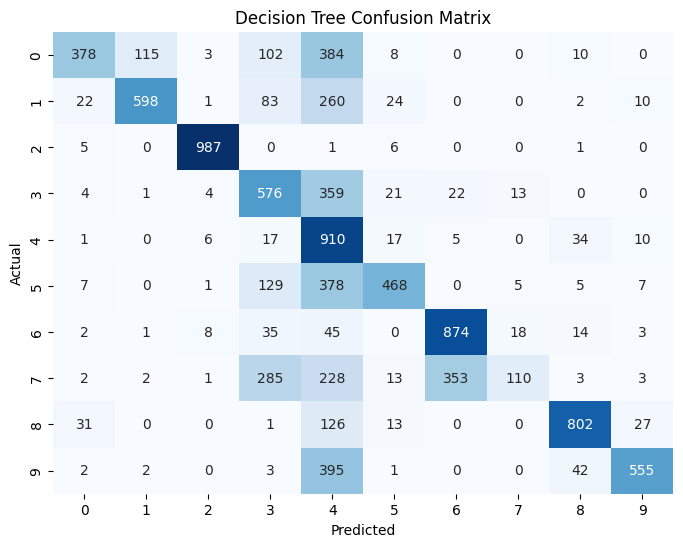

[[0.8059, 0.8073], [0.9249, 0.9246], [0.6258, 0.6258], [0.9166]]
[[0.8922, 0.8929], [0.9948, 0.9948], [0.9109, 0.9109], [0.9855]]

----------KNeighborsClassifier----------

KNeighborsClassifier Accuracy: 0.9166
KNeighborsClassifier Precision: 0.921741887468991
KNeighborsClassifier F1-score: 0.9163591670502814
KNeighborsClassifier Recall: 0.9166000000000001
KNeighborsClassifier ROC-AUC: 0.9855020388888889
KNeighborsClassifier Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


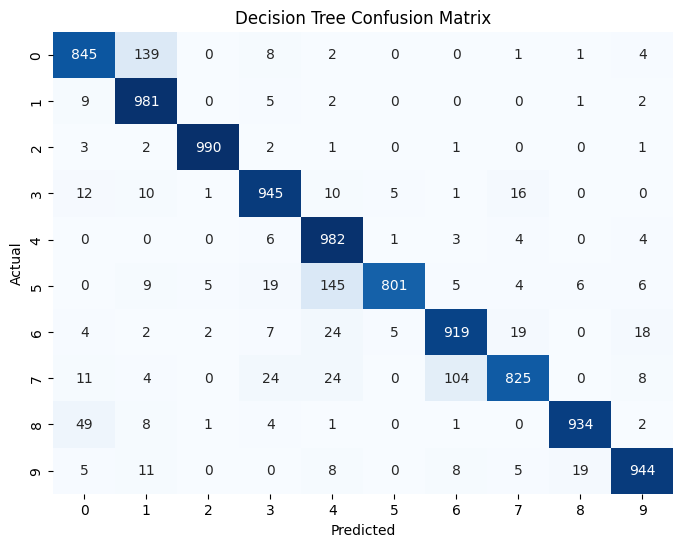

[[0.8059, 0.8073], [0.9249, 0.9246], [0.6258, 0.6258], [0.9166, 0.9166]]
[[0.8922, 0.8929], [0.9948, 0.9948], [0.9109, 0.9109], [0.9855, 0.9855]]
----------------------------------- COMPONENT SIZE 20 -----------------------------------------

----------DecisionTreeClassifier----------

DecisionTreeClassifier Accuracy: 0.8028
DecisionTreeClassifier Precision: 0.8024867441367333
DecisionTreeClassifier F1-score: 0.8017972843733844
DecisionTreeClassifier Recall: 0.8028000000000001
DecisionTreeClassifier ROC-AUC: 0.8904444444444446
DecisionTreeClassifier Confusion Matrix:
[[815  80  11  32   5   3   5   7  30  12]
 [ 39 907   7   9   7   9   3   4   6   9]
 [  6   3 928  11   9  26   5   6   1   5]
 [ 12   3   9 767  41  46  26  77   5  14]
 [  2   2   6  60 770  73   5  24  16  42]
 [  7   8  10  46 123 699  14  17  22  54]
 [  4   8   9  54  11  29 756  80   9  40]
 [ 35   9   5  53  42   8 125 655  10  58]
 [ 19   7   7  12  15  11   1   8 897  23]
 [ 16  14   4   5  26   8  11  12  70 8

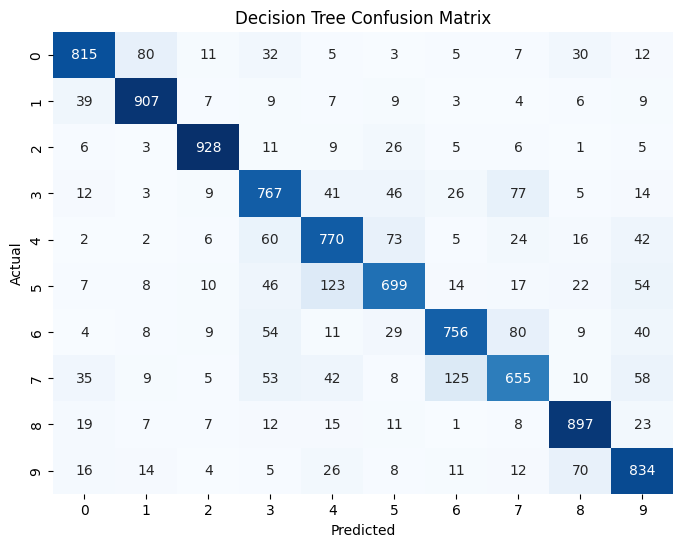

[[0.8059, 0.8073, 0.8028], [0.9249, 0.9246], [0.6258, 0.6258], [0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904], [0.9948, 0.9948], [0.9109, 0.9109], [0.9855, 0.9855]]

----------RandomForestClassifier----------

RandomForestClassifier Accuracy: 0.9243
RandomForestClassifier Precision: 0.9263928049291772
RandomForestClassifier F1-score: 0.9241130159614326
RandomForestClassifier Recall: 0.9243
RandomForestClassifier ROC-AUC: 0.9947556944444443
RandomForestClassifier Confusion Matrix:
[[872 102   0  10   4   1   2   1   8   0]
 [ 10 971   1   8   6   0   0   0   2   2]
 [  4   0 980   2   1  11   1   0   1   0]
 [ 12   4   0 930  10  20   1  23   0   0]
 [  1   0   0  13 963  16   1   1   5   0]
 [  0   1   0  12 113 868   2   1   2   1]
 [  1   2   3  26  15  21 902   8   0  22]
 [ 21   2   1  20  30   7  67 839   1  12]
 [  9   1   0   1   1   7   0   0 978   3]
 [  1   1   0   0   2   0   6   0  50 940]]


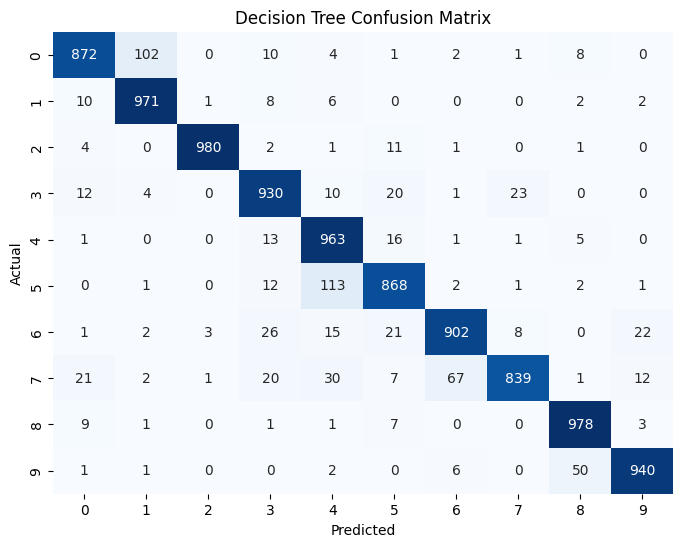

[[0.8059, 0.8073, 0.8028], [0.9249, 0.9246, 0.9243], [0.6258, 0.6258], [0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904], [0.9948, 0.9948, 0.9948], [0.9109, 0.9109], [0.9855, 0.9855]]

----------GaussianNB----------

GaussianNB Accuracy: 0.6258
GaussianNB Precision: 0.7454234197966514
GaussianNB F1-score: 0.6248144529573579
GaussianNB Recall: 0.6257999999999999
GaussianNB ROC-AUC: 0.9109404222222223
GaussianNB Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


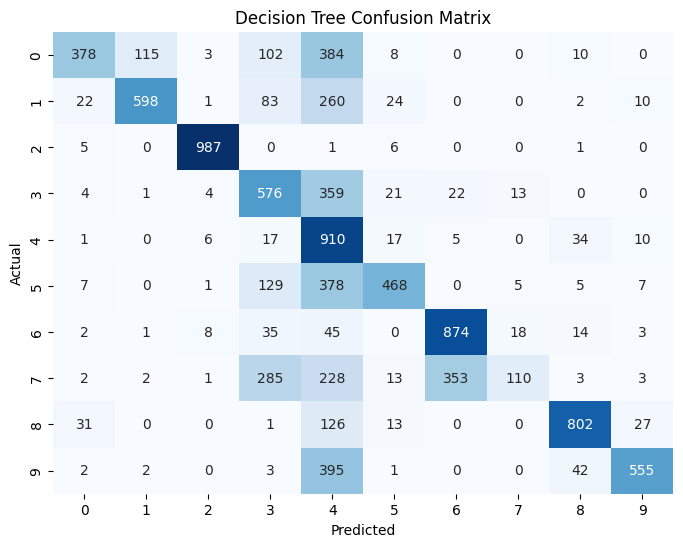

[[0.8059, 0.8073, 0.8028], [0.9249, 0.9246, 0.9243], [0.6258, 0.6258, 0.6258], [0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904], [0.9948, 0.9948, 0.9948], [0.9109, 0.9109, 0.9109], [0.9855, 0.9855]]

----------KNeighborsClassifier----------

KNeighborsClassifier Accuracy: 0.9166
KNeighborsClassifier Precision: 0.921741887468991
KNeighborsClassifier F1-score: 0.9163591670502814
KNeighborsClassifier Recall: 0.9166000000000001
KNeighborsClassifier ROC-AUC: 0.9855020388888889
KNeighborsClassifier Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 944]]


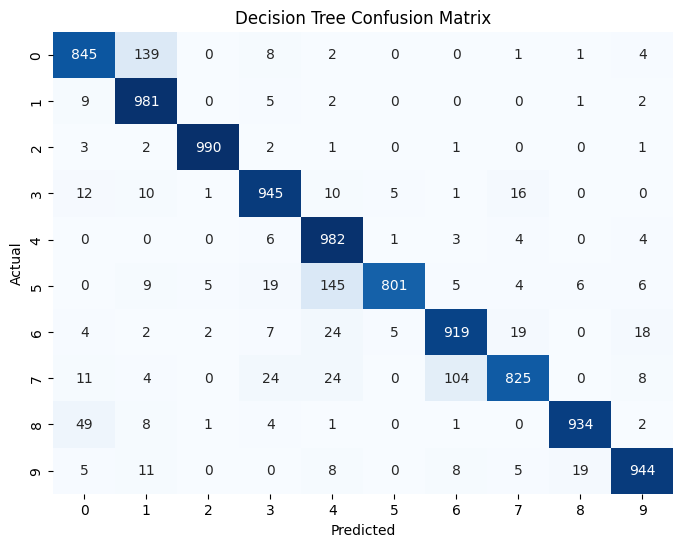

[[0.8059, 0.8073, 0.8028], [0.9249, 0.9246, 0.9243], [0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904], [0.9948, 0.9948, 0.9948], [0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855]]
----------------------------------- COMPONENT SIZE 25 -----------------------------------------

----------DecisionTreeClassifier----------

DecisionTreeClassifier Accuracy: 0.804
DecisionTreeClassifier Precision: 0.8034987961405864
DecisionTreeClassifier F1-score: 0.8028507114465775
DecisionTreeClassifier Recall: 0.8039999999999999
DecisionTreeClassifier ROC-AUC: 0.891111111111111
DecisionTreeClassifier Confusion Matrix:
[[825  79  10  30   3   4   4   5  24  16]
 [ 38 914   3  10   8   9   1   2   8   7]
 [  6   4 929  10  11  27   5   2   1   5]
 [ 10   6  11 764  43  45  27  73   1  20]
 [  5   3   4  56 758  80   6  23  17  48]
 [  7  10   6  41 113 707   9  32  28  47]
 [  4   7  12  59  15  28 755  70   9  41]
 [ 39   7   8  58  37   9 133 645  11  53]
 [ 18   7   7  12  1

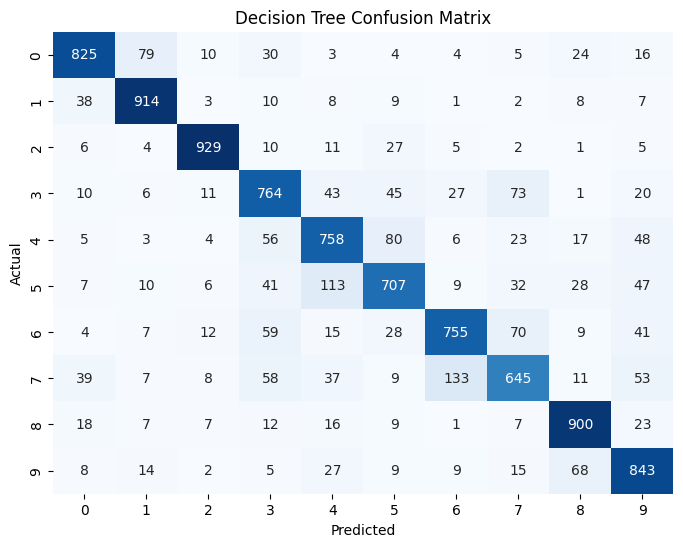

[[0.8059, 0.8073, 0.8028, 0.804], [0.9249, 0.9246, 0.9243], [0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911], [0.9948, 0.9948, 0.9948], [0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855]]

----------RandomForestClassifier----------

RandomForestClassifier Accuracy: 0.9256
RandomForestClassifier Precision: 0.9273242254221697
RandomForestClassifier F1-score: 0.925330164343866
RandomForestClassifier Recall: 0.9256
RandomForestClassifier ROC-AUC: 0.9948621722222223
RandomForestClassifier Confusion Matrix:
[[875  95   2  13   3   0   2   2   5   3]
 [ 11 969   0   9   5   0   1   0   1   4]
 [  3   0 985   1   1   8   1   0   1   0]
 [ 10   4   1 928   9  21   1  26   0   0]
 [  0   0   0  11 967  14   1   2   4   1]
 [  0   1   1  12 108 872   2   3   1   0]
 [  0   1   2  22  17  20 904  10   0  24]
 [ 16   2   1  26  30   6  65 834   1  19]
 [  9   2   0   0   1   8   0   0 977   3]
 [  2   1   0   0   2   0   7   2  41 945]]


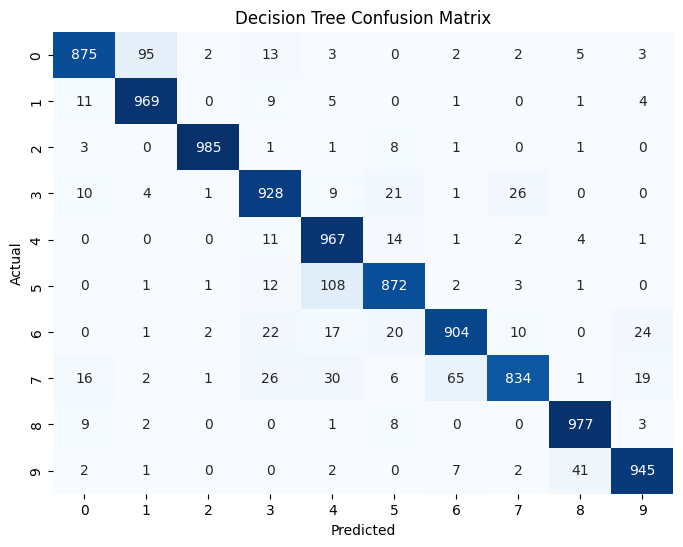

[[0.8059, 0.8073, 0.8028, 0.804], [0.9249, 0.9246, 0.9243, 0.9256], [0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911], [0.9948, 0.9948, 0.9948, 0.9949], [0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855]]

----------GaussianNB----------

GaussianNB Accuracy: 0.6258
GaussianNB Precision: 0.7454234197966514
GaussianNB F1-score: 0.6248144529573579
GaussianNB Recall: 0.6257999999999999
GaussianNB ROC-AUC: 0.9109404222222223
GaussianNB Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


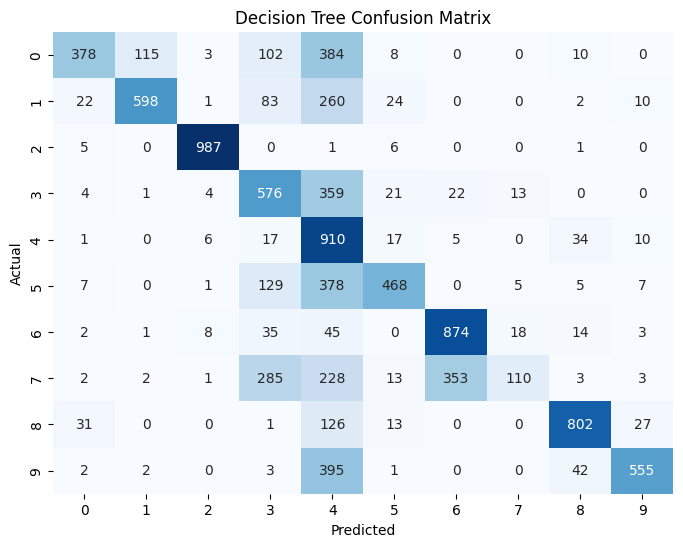

[[0.8059, 0.8073, 0.8028, 0.804], [0.9249, 0.9246, 0.9243, 0.9256], [0.6258, 0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911], [0.9948, 0.9948, 0.9948, 0.9949], [0.9109, 0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855]]

----------KNeighborsClassifier----------

KNeighborsClassifier Accuracy: 0.9166
KNeighborsClassifier Precision: 0.921741887468991
KNeighborsClassifier F1-score: 0.9163591670502814
KNeighborsClassifier Recall: 0.9166000000000001
KNeighborsClassifier ROC-AUC: 0.9855020388888889
KNeighborsClassifier Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4   1   0   1   0 934   2]
 [  5  11   0   0   8   0   8   5  19 9

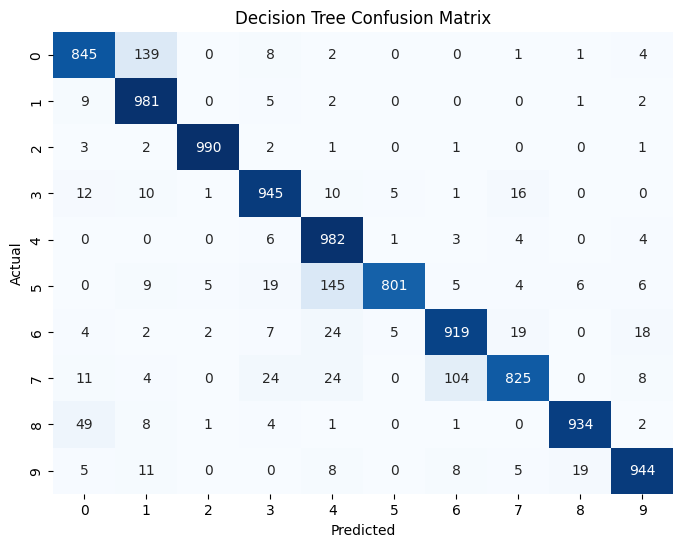

[[0.8059, 0.8073, 0.8028, 0.804], [0.9249, 0.9246, 0.9243, 0.9256], [0.6258, 0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911], [0.9948, 0.9948, 0.9948, 0.9949], [0.9109, 0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855, 0.9855]]
----------------------------------- COMPONENT SIZE 30 -----------------------------------------

----------DecisionTreeClassifier----------

DecisionTreeClassifier Accuracy: 0.8007
DecisionTreeClassifier Precision: 0.8000750285500429
DecisionTreeClassifier F1-score: 0.799576268268301
DecisionTreeClassifier Recall: 0.8007
DecisionTreeClassifier ROC-AUC: 0.8892777777777778
DecisionTreeClassifier Confusion Matrix:
[[813  78  12  32   4   2   7   8  30  14]
 [ 39 911   4  10   7  10   4   0   6   9]
 [  7   3 929  10   6  29   3   3   3   7]
 [ 14   4  10 757  35  43  30  82   6  19]
 [  5   1   5  49 764  87   7  25  13  44]
 [  7   6   7  49 126 685   8  33  26  53]
 [  3   7   7  66  11  25 764  75   3  39]
 [ 37   6  

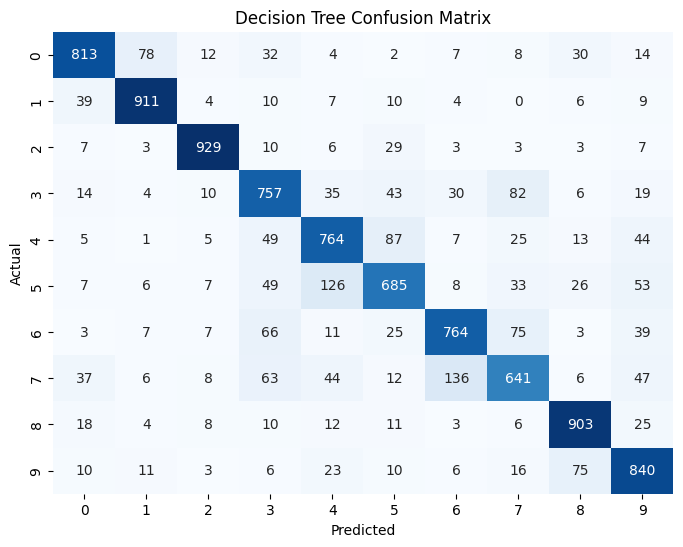

[[0.8059, 0.8073, 0.8028, 0.804, 0.8007], [0.9249, 0.9246, 0.9243, 0.9256], [0.6258, 0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911, 0.8893], [0.9948, 0.9948, 0.9948, 0.9949], [0.9109, 0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855, 0.9855]]

----------RandomForestClassifier----------

RandomForestClassifier Accuracy: 0.9233
RandomForestClassifier Precision: 0.9250598082352625
RandomForestClassifier F1-score: 0.9230268527975835
RandomForestClassifier Recall: 0.9232999999999999
RandomForestClassifier ROC-AUC: 0.9948344277777776
RandomForestClassifier Confusion Matrix:
[[876  98   0  12   2   0   3   1   6   2]
 [ 10 968   0   8   4   1   0   0   3   6]
 [  5   1 979   2   1  10   1   0   1   0]
 [  9   2   1 929   8  25   2  24   0   0]
 [  1   0   0  14 959  17   1   3   4   1]
 [  0   1   0  10 117 864   2   2   3   1]
 [  0   1   3  21  12  24 906   8   0  25]
 [ 20   3   0  24  29   7  70 828   1  18]
 [  7   3   0   0   1   6   0   0 9

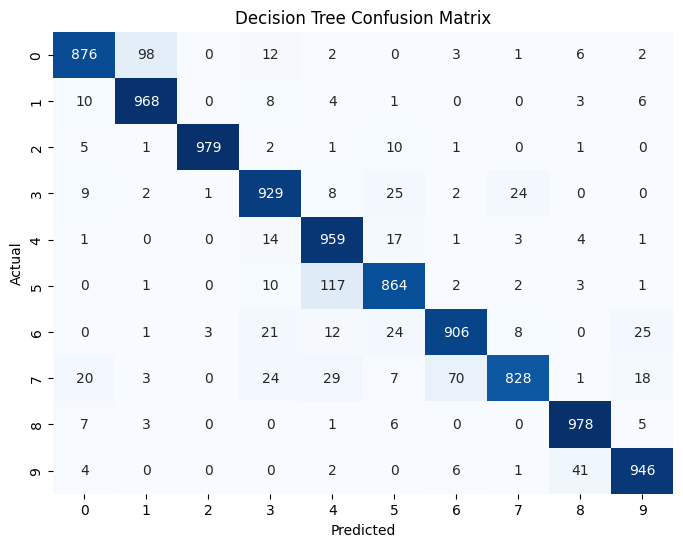

[[0.8059, 0.8073, 0.8028, 0.804, 0.8007], [0.9249, 0.9246, 0.9243, 0.9256, 0.9233], [0.6258, 0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911, 0.8893], [0.9948, 0.9948, 0.9948, 0.9949, 0.9948], [0.9109, 0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855, 0.9855]]

----------GaussianNB----------

GaussianNB Accuracy: 0.6258
GaussianNB Precision: 0.7454234197966514
GaussianNB F1-score: 0.6248144529573579
GaussianNB Recall: 0.6257999999999999
GaussianNB ROC-AUC: 0.9109404222222223
GaussianNB Confusion Matrix:
[[378 115   3 102 384   8   0   0  10   0]
 [ 22 598   1  83 260  24   0   0   2  10]
 [  5   0 987   0   1   6   0   0   1   0]
 [  4   1   4 576 359  21  22  13   0   0]
 [  1   0   6  17 910  17   5   0  34  10]
 [  7   0   1 129 378 468   0   5   5   7]
 [  2   1   8  35  45   0 874  18  14   3]
 [  2   2   1 285 228  13 353 110   3   3]
 [ 31   0   0   1 126  13   0   0 802  27]
 [  2   2   0   3 395   1   0   0  42 555]]


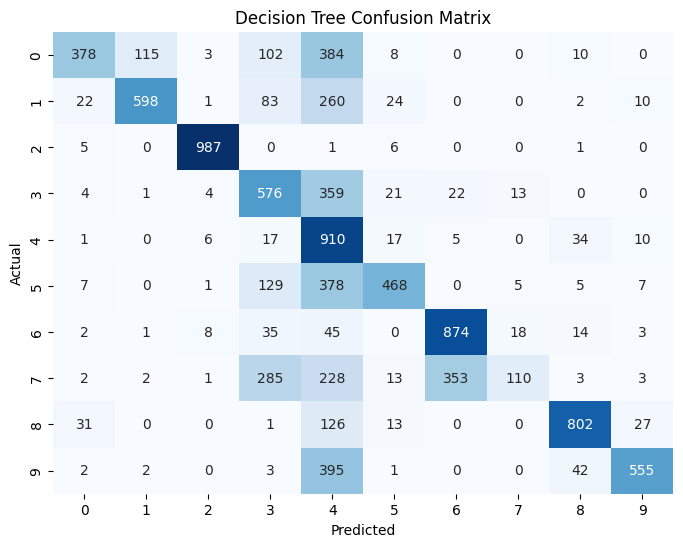

[[0.8059, 0.8073, 0.8028, 0.804, 0.8007], [0.9249, 0.9246, 0.9243, 0.9256, 0.9233], [0.6258, 0.6258, 0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911, 0.8893], [0.9948, 0.9948, 0.9948, 0.9949, 0.9948], [0.9109, 0.9109, 0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855, 0.9855]]

----------KNeighborsClassifier----------

KNeighborsClassifier Accuracy: 0.9166
KNeighborsClassifier Precision: 0.921741887468991
KNeighborsClassifier F1-score: 0.9163591670502814
KNeighborsClassifier Recall: 0.9166000000000001
KNeighborsClassifier ROC-AUC: 0.9855020388888889
KNeighborsClassifier Confusion Matrix:
[[845 139   0   8   2   0   0   1   1   4]
 [  9 981   0   5   2   0   0   0   1   2]
 [  3   2 990   2   1   0   1   0   0   1]
 [ 12  10   1 945  10   5   1  16   0   0]
 [  0   0   0   6 982   1   3   4   0   4]
 [  0   9   5  19 145 801   5   4   6   6]
 [  4   2   2   7  24   5 919  19   0  18]
 [ 11   4   0  24  24   0 104 825   0   8]
 [ 49   8   1   4 

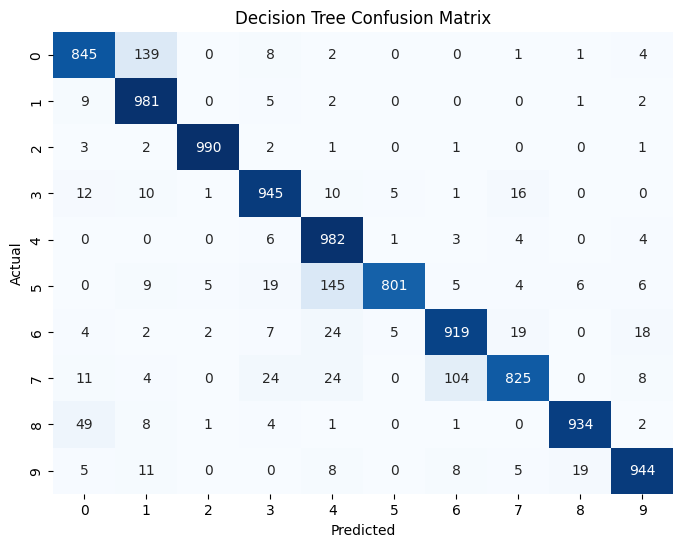

[[0.8059, 0.8073, 0.8028, 0.804, 0.8007], [0.9249, 0.9246, 0.9243, 0.9256, 0.9233], [0.6258, 0.6258, 0.6258, 0.6258, 0.6258], [0.9166, 0.9166, 0.9166, 0.9166, 0.9166]]
[[0.8922, 0.8929, 0.8904, 0.8911, 0.8893], [0.9948, 0.9948, 0.9948, 0.9949, 0.9948], [0.9109, 0.9109, 0.9109, 0.9109, 0.9109], [0.9855, 0.9855, 0.9855, 0.9855, 0.9855]]


In [27]:
#Models with accuracy for different component size
component_size=[10,15,20,25,30]
#Function of PCA
def pca(n_comp,X_train,X_test):
    #standardization
    sc=MinMaxScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    #PCA model
    pca=PCA(n_components=n_comp)
    pca.fit_transform(X_train)
    pca.transform(X_test)
    return X_train,X_test

j=0
for component in component_size:
    X_train,X_test=pca(component,X_train,X_test)
    print(f"----------------------------------- COMPONENT SIZE {component} -----------------------------------------")

    #Function to fit model and Evaluate the model using evaluation metrics
    def eval_metrics(model,X_train,y_train,X_test,y_test):
        #Fitting with the model
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)

        #Evaluation metrics
        accuracy         =     accuracy_score(y_test, y_pred)
        recall           =     recall_score(y_test, y_pred,average='macro')
        precision        =     precision_score(y_test, y_pred,average='macro')
        f1               =     f1_score(y_test, y_pred,average='macro')
        conf_matrix      =     confusion_matrix(y_test,y_pred)
        roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
        
        return accuracy,precision,f1,recall,conf_matrix, roc_auc
    
    Classifier_list=[DecisionTreeClassifier(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(n_neighbors=8)]

    k=0
    for i in Classifier_list:

        #Decision Tree Classifier
        accuracy_val,precision_val,f1_val,recall_val,confusion_matrix_val,roc_auc_val =  eval_metrics(i, X_train, y_train, X_test, y_test)
        print()
        print(f"----------{i.__class__.__name__}----------")
        print()   
        print(f"{i.__class__.__name__} Accuracy:", accuracy_val)
        print(f"{i.__class__.__name__} Precision:", precision_val)
        print(f"{i.__class__.__name__} F1-score:",f1_val)
        print(f"{i.__class__.__name__} Recall:",recall_val)
        print(f"{i.__class__.__name__} ROC-AUC:",confusion_matrix_val)
        print(f"{i.__class__.__name__} Confusion Matrix:")
        print(confusion_matrix_val)
        # #Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix_val, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title("Decision Tree Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()
        accuracy_list[k].insert(j,round(accuracy_val,4))
        roc_auc_list[k].insert(j,round(roc_auc_val,4))
        k+=1
        print(accuracy_list)
        print(roc_auc_list)
    j+=1


*Accuracy Graph of Different Models*

------------------------------------------------------------- ACCURACY GRAPH -------------------------------------------------------------
[0.8059, 0.8073, 0.8028, 0.804, 0.8007]


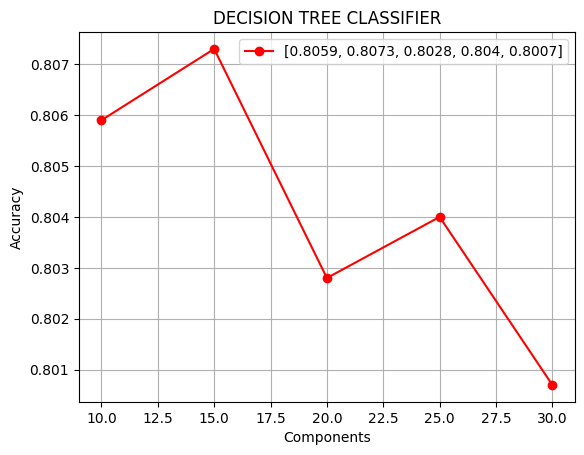

[0.9249, 0.9246, 0.9243, 0.9256, 0.9233]


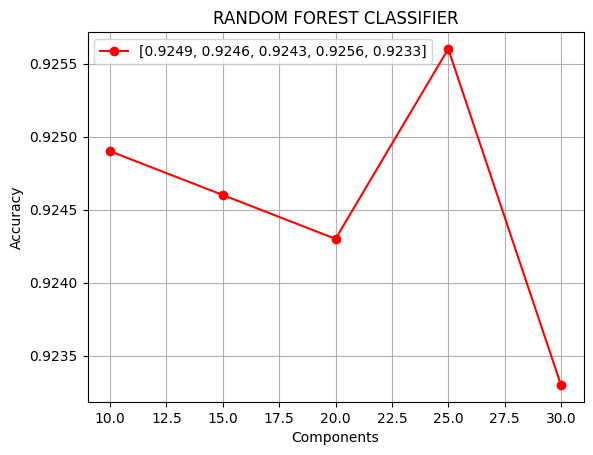

[0.6258, 0.6258, 0.6258, 0.6258, 0.6258]


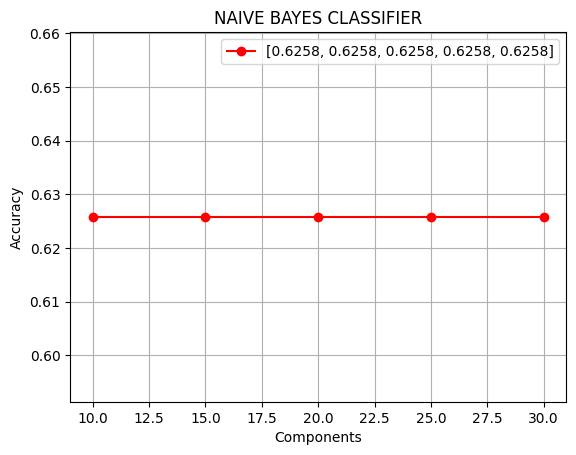

[0.9166, 0.9166, 0.9166, 0.9166, 0.9166]


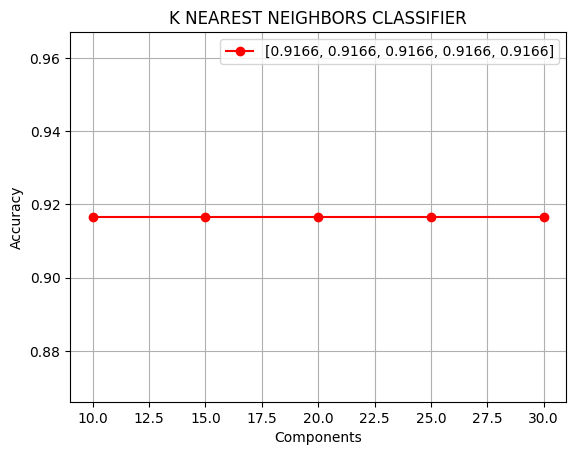

In [29]:
print("------------------------------------------------------------- ACCURACY GRAPH -------------------------------------------------------------")
model_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER"]
for model in  model_list:
    accuracy=accuracy_list[model_list.index(model)]
    print(accuracy)
    plt.plot(component_size,accuracy,label=accuracy,color='red', marker='o')
    plt.title(model)
    plt.xlabel("Components")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

*Plotting ROC_AUC Graph*

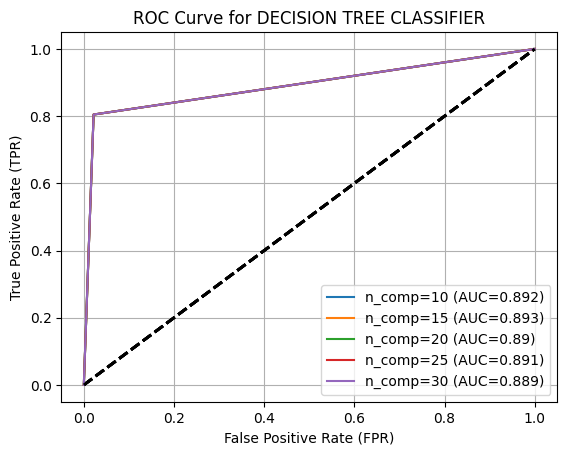

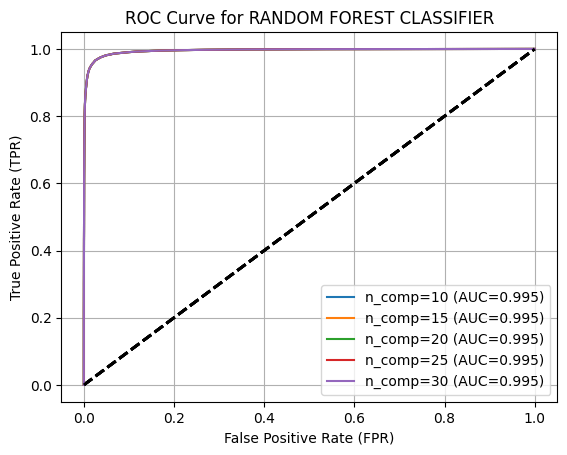

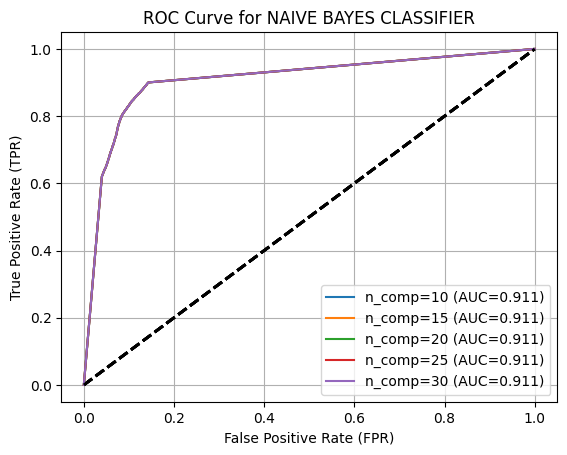

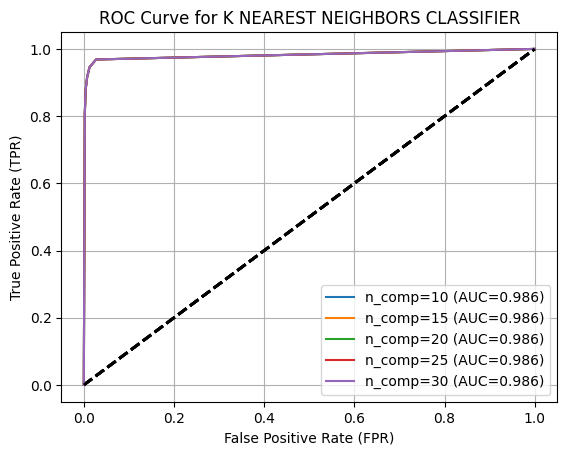

In [30]:
#ROC Curve for different Models with different Component size

model_list=[DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),GaussianNB(),KNeighborsClassifier()]
model_name_list=["DECISION TREE CLASSIFIER","RANDOM FOREST CLASSIFIER","NAIVE BAYES CLASSIFIER","K NEAREST NEIGHBORS CLASSIFIER"]
m_index=0 
for model in model_list:    
     y_test_binary = label_binarize(y_test, classes=range(10))
     fpr, tpr,threshold = roc_curve(y_test_binary.ravel(), prediction_probability(model).ravel())
     auc_value= auc(fpr,tpr)
     ra_index=0 
     for component in component_size: 
               plt.plot(  fpr,tpr,label="n_comp={} (AUC={})".format((component),(round(roc_auc_list[m_index][ra_index],3)))   )
               plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
               ra_index+=1
     plt.xlabel('False Positive Rate (FPR)')
     plt.ylabel('True Positive Rate (TPR)')
     plt.title(f'ROC Curve for {model_name_list[m_index]}')
     plt.legend()
     plt.grid(True)
     plt.show()
     m_index+=1